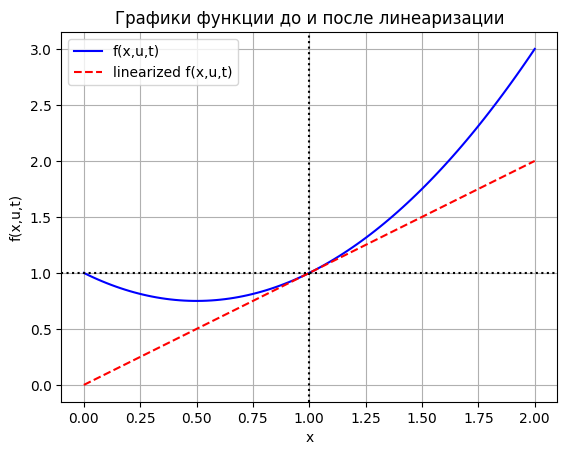

In [32]:
#Задание 1 Для произвольного диффура dx = f(x,u,t) провести линеаризацию средствами python
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Function, diff

x, u, t= symbols('x u t')
f = Function('f')(x, u, t)

# Определите функцию например:
f = x**2*u + u**2*t - x*t

# Найдем производные функции f по x, u и t
df_dx = diff(f, x)
df_du = diff(f, u)
df_dt = diff(f, t)

# Зададим точку линеаризации (x0, u0, t0)
x0 = 1
u0 = 1
t0 = 1

# Вычислим функцию и её производные в точке линеаризации
f_0 = f.subs({x: x0, u: u0, t: t0})
df_dx_0 = df_dx.subs({x: x0, u: u0, t: t0})
df_du_0 = df_du.subs({x: x0, u: u0, t: t0})
df_dt_0 = df_dt.subs({x: x0, u: u0, t: t0})

# Выразим линеаризованную функцию
f_lin = f_0 + (x - x0) * df_dx_0 + (u - u0) * df_du_0 + (t - t0) * df_dt_0

# Построение графиков
# Зададим диапазоны переменных x, u и t
x_vals = np.linspace(0, 2, 100)
u_vals = np.linspace(0, 2, 100)
t_vals = np.linspace(0, 2, 100)

# Преобразование sympy функций в numpy функции
f_np = np.vectorize(lambda x, u, t: f.subs({'x': x, 'u': u, 't': t}).evalf())
f_lin_np = np.vectorize(lambda x, u, t: f_lin.subs({'x': x, 'u': u, 't': t}).evalf())

# Выберем значения u и t для построения графика функции f(x) и её линеаризации
u_val = 1
t_val = 1

# Вычислим значения функций до и после линеаризации
f_vals = f_np(x_vals, u_val, t_val)
f_lin_vals = f_lin_np(x_vals, u_val, t_val)

plt.plot(x_vals, f_vals, label='f(x,u,t)', linestyle='-', color='blue')
plt.plot(x_vals, f_lin_vals, label='linearized f(x,u,t)', linestyle='--', color='red')
plt.axvline(x0, color='black', linestyle=':')
plt.axhline(f_0, color='black', linestyle=':')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x,u,t)')
plt.title('Графики функции до и после линеаризации')
plt.grid()
plt.show()

# На трехмерном графике наглядно не видно линеаризацию, поэтому построил двухмерный график, но в другом блоке кода (ниже) построил трехмерный график.

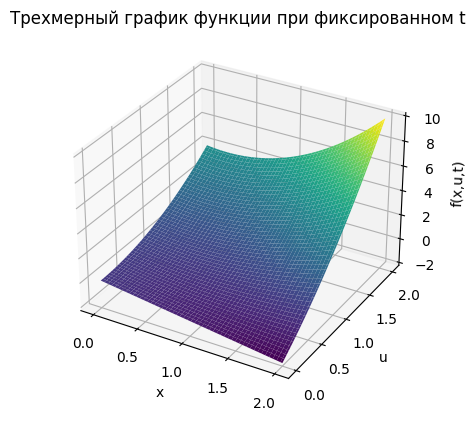

In [31]:
# Создание трехмерного графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Зададим диапазоны переменных x и u
x_vals = np.linspace(0, 2, 100)
u_vals = np.linspace(0, 2, 100)

# Преобразование sympy функции в numpy функции
f_np = np.vectorize(lambda x, u, t: f.subs({'x': x, 'u': u, 't': t}).evalf())

# Выберем значение t для построения графика функции f(x, u) при различных значениях x и u
t_val = 1

# Создание сетки значений
X, U = np.meshgrid(x_vals, u_vals)

# Вычисление функции на сетке
f_vals = f_np(X, U, t_val)

# Построение графика
ax.plot_surface(X, U, f_vals, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('u')
ax.set_zlabel('f(x,u,t)')
ax.set_title('Трехмерный график функции при фиксированном t')
plt.show()

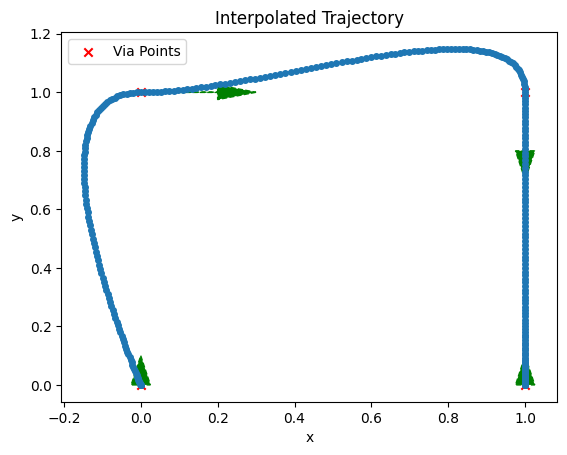

In [33]:
#Задание 2 Реализовать интерполяцию траектории с несколькими точками
import numpy as np
import matplotlib.pyplot as plt

def calculate_coefficients(via_points, via_velocities, via_times):
    k = len(via_points)
    coefficients = []

    for j in range(k - 1):
        a_j0 = via_points[j]
        a_j1 = via_velocities[j]
        delta_t_j = via_times[j + 1] - via_times[j]
        a_j2 = (3*via_points[j+1] - 3*via_points[j] - 2*via_velocities[j]*delta_t_j - via_velocities[j+1]*delta_t_j) / delta_t_j**2
        a_j3 = (2*via_points[j] + (via_velocities[j] + via_velocities[j+1])*delta_t_j - 2*via_points[j+1]) / delta_t_j**3
        coefficients.append([a_j0, a_j1, a_j2, a_j3])

    return coefficients

def interpolate_single_joint(coefficients, times, delta_t_step=0.01):
    joint_values = []
    time_values = []

    for segment_idx, segment_coeff in enumerate(coefficients):
        start_time = times[segment_idx]
        end_time = times[segment_idx + 1]

        while start_time < end_time:
            delta_t = start_time - times[segment_idx]
            joint_val = (segment_coeff[0] +
                         segment_coeff[1] * delta_t +
                         segment_coeff[2] * delta_t**2 +
                         segment_coeff[3] * delta_t**3)
            joint_values.append(joint_val)
            time_values.append(start_time)
            start_time += delta_t_step

    return time_values, joint_values

# Через точки, скорости и время
via_points_x = [0, 0, 1, 1]
via_points_y = [0, 1, 1, 0]
via_velocities_x = [0, 1, 0, 0]
via_velocities_y = [0, 0, -1, 0]
via_times = [0, 1, 2, 3]

# Рассчитаем коэффициенты для каждого сустава
coefficients_x = calculate_coefficients(via_points_x, via_velocities_x, via_times)
coefficients_y = calculate_coefficients(via_points_y, via_velocities_y, via_times)

# Интерполируем значения суставов
times, joint_values_x = interpolate_single_joint(coefficients_x, via_times)
_, joint_values_y = interpolate_single_joint(coefficients_y, via_times)

# Построем полученную траекторию
plt.plot(joint_values_x, joint_values_y, marker="o", linestyle="-", markersize=4)
plt.scatter(via_points_x, via_points_y, color="red", marker="x", label="Via Points")

# Добавим касательные векторы на график
for i in range(len(via_points_x)):
    tangent_end_x = via_points_x[i] + via_velocities_x[i] * 0.2
    tangent_end_y = via_points_y[i] + via_velocities_y[i] * 0.2
    plt.arrow(via_points_x[i], via_points_y[i], tangent_end_x - via_points_x[i], tangent_end_y - via_points_y[i],
              linestyle="--", color="green", head_length=0.1, head_width=0.05)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolated Trajectory")
plt.legend()
plt.show()